**1. Set up:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf

# This code is optional to check if the GPU exists in your system
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!unrar x "/content/drive/MyDrive/Data/validdata_750.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Data/validdata_750.rar

Creating    validdata                                                 OK
Creating    validdata/dress                                           OK
Extracting  validdata/dress/000016.jpg                                     0%  OK 
Extracting  validdata/dress/000129.jpg                                     0%  OK 
Extracting  validdata/dress/000179.jpg                                     0%  OK 
Extracting  validdata/dress/000340.jpg                                     0%  OK 
Extracting  validdata/dress/000346.jpg                                     0%  OK 
Extracting  validdata/dress/000355.jpg                                     0%  OK 
Extracting  validdata/dress/000414.jpg                                     0%  OK 
Extracting  validdata/dress/000807.jpg                                    

In [ ]:
!unrar x "/content/drive/MyDrive/Data/traindata_2600.rar"

Streaming output truncated to the last 5000 lines.
Extracting  traindata/skirt/019564.jpg                                    71%  OK 
Extracting  traindata/skirt/019645.jpg                                    71%  OK 
Extracting  traindata/skirt/019649.jpg                                    72%  OK 
Extracting  traindata/skirt/019651.jpg                                    72%  OK 
Extracting  traindata/skirt/019653.jpg                                    72%  OK 
Extracting  traindata/skirt/019655.jpg                                    72%  OK 
Extracting  traindata/skirt/019713.jpg                                    72%  OK 
Extracting  traindata/skirt/019869.jpg                                    72%  OK 
Extracting  traindata/skirt/020000.jpg                                    72%  OK 
Extracting  traindata/skirt/020958.jpg                                    72%  OK 
Extracting  traindata/skirt/0

In [ ]:
!unrar x "/content/drive/MyDrive/Data/traindata_1000.rar"

Streaming output truncated to the last 5000 lines.
Extracting  traindata_1000/outwear/002305.jpg                             19%  OK 
Extracting  traindata_1000/outwear/002888.jpg                             19%  OK 
Extracting  traindata_1000/outwear/003177.jpg                             19%  OK 
Extracting  traindata_1000/outwear/003871.jpg                             19%  OK 
Extracting  traindata_1000/outwear/005376.jpg                             19%  OK 
Extracting  traindata_1000/outwear/005707.jpg                             19%  OK 
Extracting  traindata_1000/outwear/006427.jpg                             19%  OK 
Extracting  traindata_1000/outwear/006468.jpg                             19%  OK 
Extracting  traindata_1000/outwear/006474.jpg                             19%  OK 
Extracting  traindata_1000/outwear/006482.jpg                             19%  OK 
Extracting  traindata_1000/ou

In [ ]:
!unrar x "/content/drive/MyDrive/Data/validdata_300.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Data/validdata_300.rar

Creating    validdata_300                                             OK
Creating    validdata_300/dress                                       OK
Extracting  validdata_300/dress/000340.jpg                                 0%  OK 
Extracting  validdata_300/dress/000346.jpg                                 0%  OK 
Extracting  validdata_300/dress/000414.jpg                                 0%  OK 
Extracting  validdata_300/dress/000811.jpg                                 0%  OK 
Extracting  validdata_300/dress/000821.jpg                                 0%  OK 
Extracting  validdata_300/dress/001345.jpg                                 0%  OK 
Extracting  validdata_300/dress/001470.jpg                                 0%  OK 
Extracting  validdata_300/dress/002473.jpg                                

In [ ]:
! pip install --upgrade tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.4 MB/s 


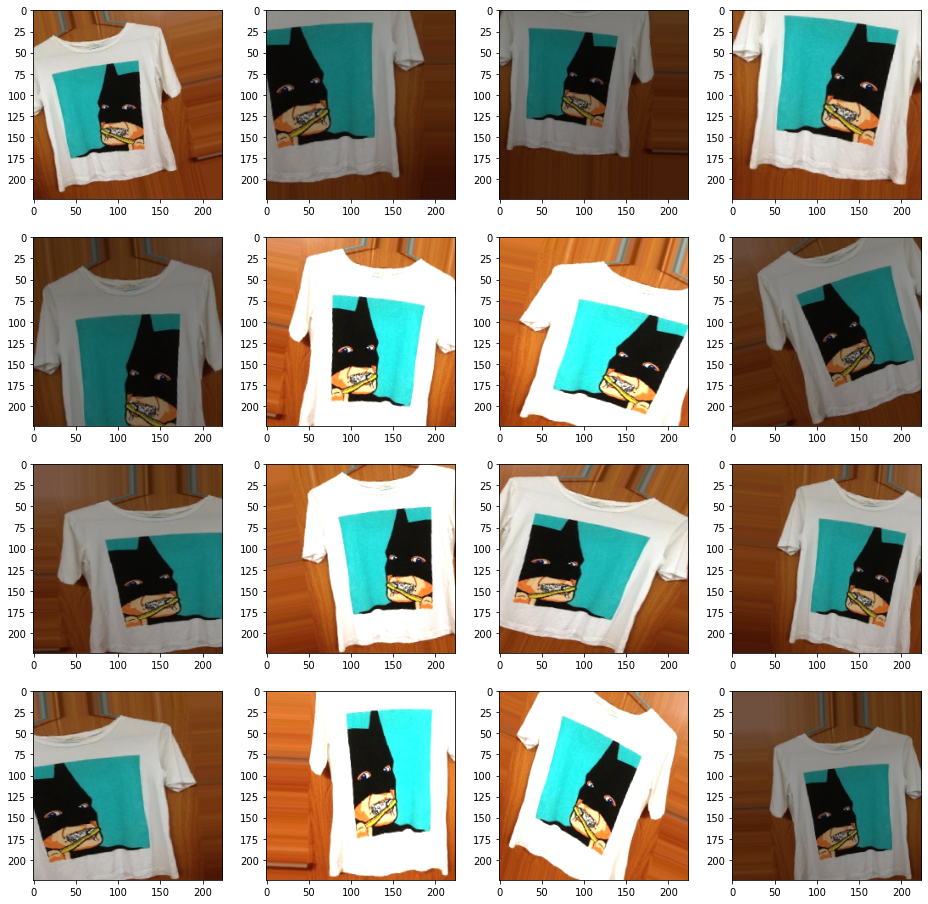

In [ ]:
import tensorflow as tf
import os
from keras.applications.mobilenet_v3 import MobileNetV3Large, preprocess_input
import keras
from keras.layers import Conv2D,Dense, MaxPooling2D,Dropout,Flatten, Activation, BatchNormalization,LeakyReLU, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import adam_v2
import numpy as np
from keras import callbacks
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings('ignore')
img = keras.utils.load_img('/content/006859.jpg', target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(
        rotation_range=20,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.5, 1.5],
        validation_split=0.2,
    )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

**2. Train:**

In [ ]:
!python /content/drive/MyDrive/Diagram/lrfinder/findlr.py

2022-11-18 05:47:31.355434: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                           

In [ ]:
lr = 0.0001
wd = 1e-3 * lr
TRAINNO = 312184
VALIDNO = 52489
TRAINSAVEFOLDER = '/content/traindata'
TESTSAVEFOLDER = '/content/validdata'
FAST_RUN = False
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
batch_size = 32
batch_size_valid = 16
epochs = 10 if FAST_RUN else 200
num_classes = 6
drop_rate = 0.4
shift_fraction = 0.2
checkpointfile = '/content/drive/MyDrive/Model/cnn.h5'

In [ ]:
import tensorflow as tf
import os
from keras.applications.mobilenet_v3 import MobileNetV3Large, preprocess_input
import keras
from keras.layers import Conv2D,Dense, MaxPooling2D,Dropout,Flatten, Activation, BatchNormalization,LeakyReLU, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import adam_v2
import numpy as np
from keras import callbacks
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def build_model(premodel, num_classes, drop_rate, learning_rate):
    model = keras.models.Sequential()
    model.add(premodel)
    model.add(GlobalMaxPooling2D())
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))


    opt = adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt , metrics=[tf.keras.metrics.CategoricalAccuracy()])
    tf.keras.utils.plot_model(model, show_shapes=True)
    return model

In [ ]:
def data_aug(train_path, batch_size, batch_size_valid, shift_fraction, image_size):
    traingene = ImageDataGenerator(
        validation_split=0.2,
        preprocessing_function=preprocess_input
    )
    # validgene = ImageDataGenerator(preprocessing_function=preprocess_input)

    class_subset = sorted(os.listdir(TRAINSAVEFOLDER))
    train_set = traingene.flow_from_directory(
            train_path,
            target_size = image_size,
            batch_size = batch_size,
            class_mode = 'categorical',
            classes = class_subset,
            subset='training',
            shuffle = True,
            seed = 42)
    valid_set = traingene.flow_from_directory(
            train_path,
            target_size = image_size,
            batch_size = batch_size_valid,
            class_mode='categorical',
            classes = class_subset,
            subset='validation',
            shuffle=True,
            seed=42)
    return train_set, valid_set

In [ ]:
def fit_model(model, train_set, validation_set, epochs, checkpointfile):
    history = model.fit(
        train_set,
        epochs = epochs,
        validation_data = validation_set,
        verbose = 1)
    return model, history

In [ ]:
def draw_result(model_history):
    accuracy = model_history.history['categorical_accuracy']
    val_accuracy = model_history.history['val_categorical_accuracy']

    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training and Validation Loss')
    plt.savefig('/content/drive/MyDrive/Diagram/First_Model_Loss.jpg')
    plt.show()

In [ ]:
mobb = MobileNetV3Large(weights = 'imagenet',
    include_top = False,
    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

for layer in mobb.layers:
    layer.trainable = False

# Warm up
for layer in mobb.layers:
    print(layer, layer.trainable)

model = build_model(mobb, num_classes, drop_rate, lr)
print(model.summary())
# plot_model(model, 'model_summary.jpg')

train_set, valid_set = data_aug(TRAINSAVEFOLDER, batch_size, batch_size_valid, shift_fraction, image_size)
# print(train_set, valid_set)

model, history = fit_model(model, train_set, valid_set, epochs, checkpointfile)
draw_result(history)

model.save('/content/drive/MyDrive/Model/cnn')
model.save_weights('/content/drive/MyDrive/Model/cnn_weights.h5')

12683000/12683000 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f5d1e8ee850> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f5d8376dc10> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f5d172618d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5d187390d0> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x7f5d168a3690> False
<keras.layers.activation.relu.ReLU object at 0x7f5d168a3d50> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x7f5d12ec9650> False
<keras.layers.merging.multiply.Multiply object at 0x7f5d171ded10> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f5d168a3a90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5d12eebe50> False
<keras.layers.activation.relu.ReLU object at 0x7f5d12eebf10> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f5

NameError: ignored

In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Large, preprocess_input
# from keras.applications.resnet import ResNet50, preprocess_input
# from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.applications.inception_v3 import InceptionV3, preprocess_input


Found 4500 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 2048)              9439232   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Drop

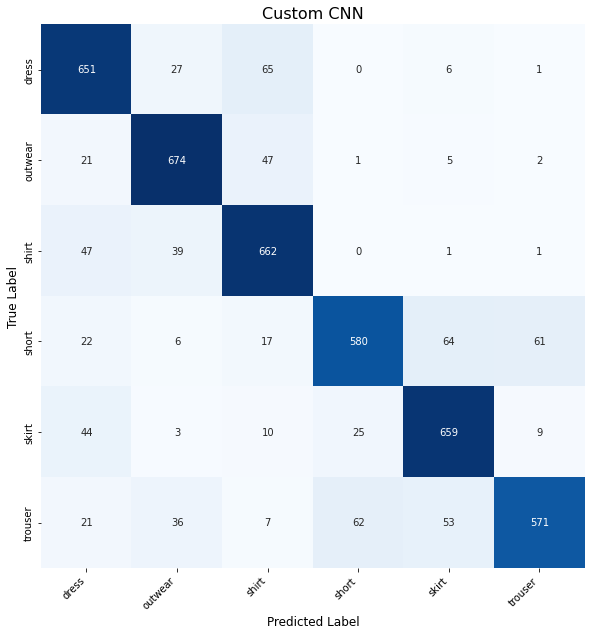

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.models import load_model
testgene = ImageDataGenerator(preprocessing_function=preprocess_input)
class_subset = sorted(os.listdir(TRAINSAVEFOLDER))
test_set = testgene.flow_from_directory(
    TESTSAVEFOLDER,
    target_size=image_size,
    class_mode=None,
    classes=class_subset,
    batch_size=1,
    shuffle=False,
    seed=42)

restored_model = tf.keras.models.load_model('/content/drive/MyDrive/Model/cnn.h5')
print(restored_model.summary())
true_classes = test_set.classes
train_set, valid_set = data_aug(TRAINSAVEFOLDER, batch_size, batch_size_valid, shift_fraction, image_size)
class_indices = train_set.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
model_preds = restored_model.predict(test_set)
model_pred_classes = np.argmax(model_preds, axis=1)
acc = accuracy_score(true_classes, model_pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

class_names = test_set.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10))

plot_heatmap(true_classes, model_pred_classes, class_names, ax1, title="Custom CNN")
precision = precision_score(true_classes, model_pred_classes, average='macro')
print(precision)
recall = recall_score(true_classes, model_pred_classes, average='macro')
print(recall)
f1 = f1_score(true_classes, model_pred_classes, average='macro')
print(f1)
fig.savefig('/content/drive/MyDrive/Diagram/cnn.jpg')
plt.show()